In [1]:
# importing the recquired libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

plt.style.use('ggplot')
pd.set_option('display.max_columns',24)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

C:\Users\vaibh\AppData\Local\Temp/ipykernel_9500/1386055003.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 1. Data Overview

In [2]:
# Loading the dataset
df = pd.read_excel('Superstore.xlsx')
# making copy of the original dataset
data = df
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0000,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.0000,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.0000,6.8714


The dataset contains records of successful orders. It also contains features such as the Order Date, Ship Date, Country and Region from where the customer lives/resides, product Category,Quantity, Sales and Profit.

In [31]:
# checking the shape of the dataset
data.shape

(9994, 21)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

The dataset contains 9994 records (rows) and 21 features (columns). Among the features, 2 have datetime data type (date), 3 are floating point (decimals), 3 are integers (whole numbers), and 13 are object (strings) data types. It also has no missing values. Memory requirement for the dataset is 1.6 MB.

The dataset also has no missing values. (see Non-Null Count)

---------------------------------------------------------------------------------------------------------------------------------------------

# 2. Data Preprocessing

With the overview, the dataset will not need a lot of data cleaning. However, there are certain transformations that needs to be done to ready the data for the analysis. Specifically, the Row ID column and some others are not necessary for this particular analysis and will be removed. Feature engineering will also be done.

In [33]:
data=data.drop('Row ID',axis=1)

data=data[[ 
        'Order ID', 
        'Order Date', 
        'Ship Date', 
        'Ship Mode', 
    #'Customer ID',
    #'Customer Name', 
        'Segment', 
    #'Country', 
        'City', 
        'State', 
    #'Postal Code',
        'Region', 
    #'Product ID', 
        'Category', 
        'Sub-Category', 
        'Product Name',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]
data.head(3) # final dataframe, after columns were removed

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0000,41.9136
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.0000,219.5820
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.0000,6.8714


In [34]:
# checking desired columns are actually removed or not
data.shape

(9994, 15)

In [35]:
# feature engineering, extracts specific date values from the `Order Date` column, creates new features from existing features
data['month']=data['Order Date'].dt.month 
data['year']=data['Order Date'].dt.year
data['year_month']=data['Order Date'].dt.to_period('M')
data['total_discount_in_dollars']=data['Sales'] * data['Discount'] # discount's equivalent to dollars
data['selling_price']=data['Sales'] / data['Quantity'] # calculates selling price for the each product
data['(net)_profit_before_discount']=data['Sales'] * data['Discount'] + data['Profit'] # net profit before deducting discount
data['order_fulfillment_time']=data['Ship Date'] - data['Order Date'] # interval between order placed and order shipped
data['net_profit_per_unit_sold']=data['Profit'] / data['Quantity'] # net profit generated per unit sold
data=data.rename(columns={'Profit':'net_profit'}) # renames Profit column with net_profit, a more specific name
data['profit_margin']=data['net_profit'] / data['Sales'] * 100 # for a 25% profit margin, the company makes .25 dollars per 1 dollar sale
data['discounted_sales']=data['Sales'] - (data['Discount']*data['Sales']) # extracts sales accounted for discount

In [36]:
print('Output dataframe:')
data.head(5)

Output dataframe:


,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,...,Discount,net_profit,month,year,year_month,total_discount_in_dollars,selling_price,(net)_profit_before_discount,order_fulfillment_time,net_profit_per_unit_sold,profit_margin,discounted_sales
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,...,0.0000,41.9136,11,2013,2013-11,0.0000,130.9800,41.9136,3 days,20.9568,16.0000,261.9600
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,...,0.0000,219.5820,11,2013,2013-11,0.0000,243.9800,219.5820,3 days,73.1940,30.0000,731.9400
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,...,0.0000,6.8714,6,2013,2013-06,0.0000,7.3100,6.8714,4 days,3.4357,47.0000,14.6200
3,US-2012-108966,2012-10-11,2012-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,...,0.4500,-383.0310,10,2012,2012-10,430.9099,191.5155,47.8789,7 days,-76.6062,-40.0000,526.6676
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,...,0.2000,2.5164,10,2012,2012-10,4.4736,11.1840,6.9900,7 days,1.2582,11.2500,17.8944


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   Order ID                      9994 non-null   object         
 1   Order Date                    9994 non-null   datetime64[ns] 
 2   Ship Date                     9994 non-null   datetime64[ns] 
 3   Ship Mode                     9994 non-null   object         
 4   Segment                       9994 non-null   object         
 5   City                          9994 non-null   object         
 6   State                         9994 non-null   object         
 7   Region                        9994 non-null   object         
 8   Category                      9994 non-null   object         
 9   Sub-Category                  9994 non-null   object         
 10  Product Name                  9994 non-null   object         
 11  Sales            

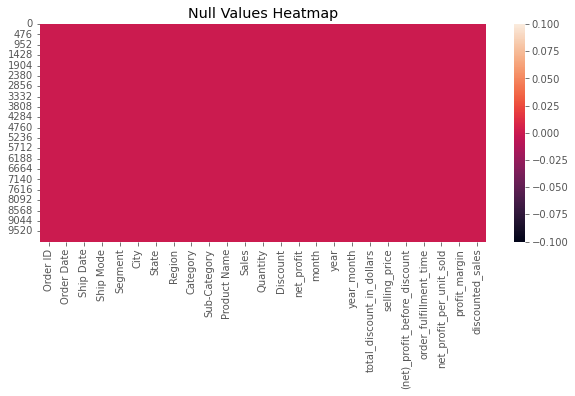

In [39]:
plt.figure(figsize=(10,4))

plt.title('Null Values Heatmap')
sns.heatmap(data.isnull())
plt.show()

The heatmap above confirms no missing values in the dataset.

With this, the data is now ready for analysis. Data cleaning and transformations are always done to almost all real-world datasets. This includes handling for missing values, casting data to appropriate data types, standardizing or normalizing values, feature engineering, and date time and string types transformations, among others. Since this particular dataset only requires some transformations and not much cleaning, we can now move one.

---------------------------------------------------------------------------------------------------------------------------------------------

# 3. Exploratory Data Analysis

In [41]:
print('The following shows descriptive statistics on numeric data. This can also reveal potential errors or anomalies with the data.')
data.describe(include='all')

The following shows descriptive statistics on numeric data. This can also reveal potential errors or anomalies with the data.


,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,...,Discount,net_profit,month,year,year_month,total_discount_in_dollars,selling_price,(net)_profit_before_discount,order_fulfillment_time,net_profit_per_unit_sold,profit_margin,discounted_sales
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994.0000,...,9994.0000,9994.0000,9994.0000,9994.0000,9994,9994.0000,9994.0000,9994.0000,9994,9994.0000,9994.0000,9994.0000
unique,5009,NaN,NaN,4,3,531,49,4,3,17,1841,NaN,...,NaN,NaN,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA-2014-100111,NaN,NaN,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,Staples,NaN,...,NaN,NaN,NaN,NaN,2014-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,14,NaN,NaN,5968,5191,915,2001,3203,6026,1523,227,NaN,...,NaN,NaN,NaN,NaN,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013-04-30 19:20:02.401441024,2013-05-04 18:20:49.229537792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.8580,...,0.1562,28.6569,7.8146,2012.7229,NaN,32.2776,60.9196,60.9345,3 days 23:00:46.828096858,7.7994,12.0314,197.5804
min,NaN,2011-01-04 00:00:00,2011-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4440,...,0.0000,-6599.9780,1.0000,2011.0000,NaN,0.0000,0.3360,-3449.9885,0 days 00:00:00,-1319.9956,-275.0000,0.0888
25%,NaN,2012-05-23 00:00:00,2012-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.2800,...,0.0000,1.7288,5.0000,2012.0000,NaN,0.0000,5.4700,4.7754,3 days 00:00:00,0.7228,7.5000,14.3360
50%,NaN,2013-06-27 00:00:00,2013-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.4900,...,0.2000,8.6665,9.0000,2013.0000,NaN,1.0368,16.2700,14.6352,4 days 00:00:00,2.7670,27.0000,45.9232
75%,NaN,2014-05-15 00:00:00,2014-05-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.9400,...,0.2000,29.3640,11.0000,2014.0000,NaN,14.8704,63.9400,50.3280,5 days 00:00:00,8.7032,36.2500,180.1765
max,NaN,2014-12-31 00:00:00,2015-01-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22638.4800,...,0.8000,8399.9760,12.0000,2014.0000,NaN,11319.2400,3773.0800,9508.1616,7 days 00:00:00,1679.9952,50.0000,17499.9500


The dataset contains sales data from 2011-01-04 to 2014-12-31. Earliest Ship Date information was in 2011-01-08, while the latest was in 2015-01-06. No apparent errors or anomalies can be observed with the Sales, Quantity, and Discount columns. With net_profit, (net)_profit_before_discount, and net_profit_per_unit_sold, there are negative values as the min, which may mean actual negative profit or possible error. This requires further investigation.

### 3.1. Sales Performance¶

What are the overall sales trends, and how have they evolved over time? Are there any significant fluctuations that need to be addressed?

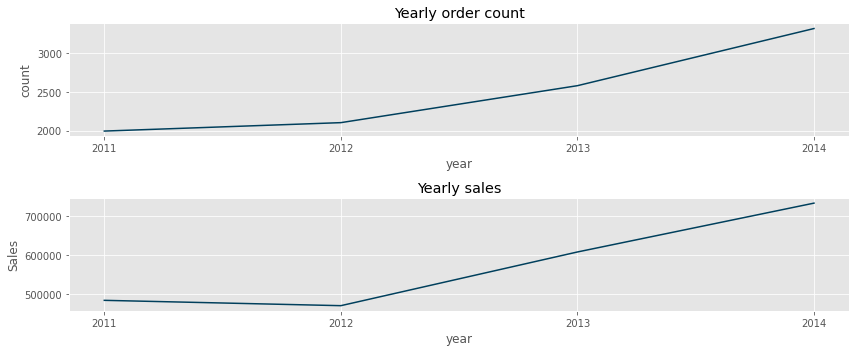

In [42]:
plt.figure(figsize=(12,5))

plt.subplot(211)
data.groupby(['year'])['Order Date'].count().plot(c='#003f5c')
plt.ylabel('count')
plt.xticks(data.groupby(['year'])['Order Date'].count().index)
plt.title('Yearly order count')

plt.subplot(212)
data.groupby('year')['Sales'].sum().plot(c='#003f5c')
plt.ylabel('Sales')
plt.xticks(data.groupby('year')['Sales'].sum().index)
plt.title('Yearly sales')

plt.tight_layout()
plt.show()

In [43]:
print('Annual total sales: ')
data.groupby('year')['Sales'].sum()

Annual total sales: 


year
2011   484247.4981
2012   470532.5090
2013   608473.8300
2014   733947.0232
Name: Sales, dtype: float64

Over time, orders had increased and so are sales. However, a slight dip in sales can be obsered in 2012. From 484,247 dollars total sales in 2011, Superstore sales slightly dipped to 470,532 dollars in the following year, which is a 2.83% difference or 13,715 dollars.

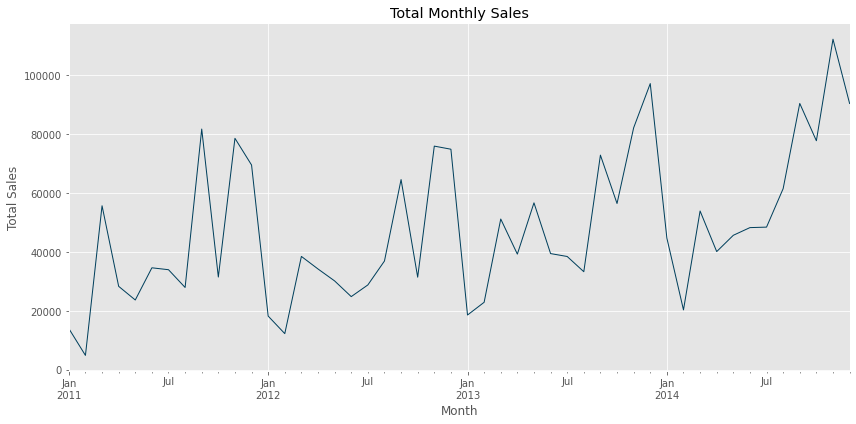

In [44]:
data.groupby('year_month')['Sales'].sum().plot(c='#003f5c',linewidth=1,figsize=(12,6))
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

Seasonal trends occured. Superstore sales increase towards the end of the year starting in November and is sustained until December, and then drops in January. Between February and March each year, sales rise again. From April to August, a generally stable trend is evident every year. Furthermore, a sharp downward trend is observed during October.

This following provides a rouch estimate of this observation:

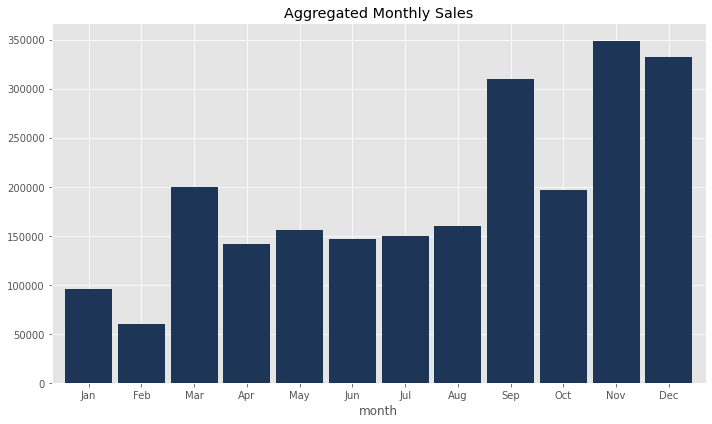

In [46]:
data.groupby('month')['Sales'].sum().plot(kind='bar',color='#1d3557',figsize=(10,6),width=.89)
plt.title('Aggregated Monthly Sales')
plt.xticks(ticks=np.arange(0,12,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)

plt.tight_layout()
plt.show()

The visualization above shows total sales for each month over the course of 4 years. By magnitude, sales are higher towards the holiday seasons. Also, the academic year (opening of schools) in America usually starts in late August or early September, which can possibly explain higher sales in September of school-related products such as binders, home and office supplies, papers, bookcases, and accessories, among others (see graph below).

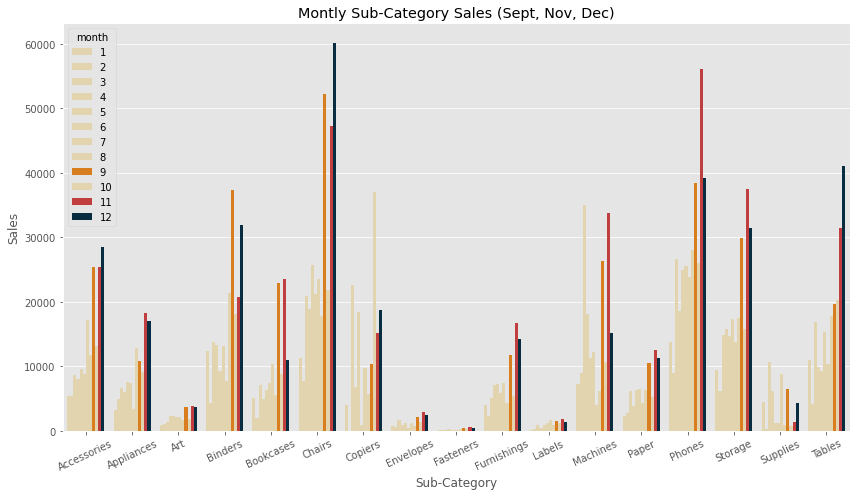

In [47]:

month_subcat=pd.DataFrame(data.groupby(['month','Sub-Category'])['Sales'].sum().reset_index())
month_subcat

plt.figure(figsize=(12,7))
sns.barplot(data=month_subcat,\
            x='Sub-Category',\
            y='Sales',\
            hue='month',\
            palette=['#e9d8a6','#e9d8a6','#e9d8a6',\
                     '#e9d8a6','#e9d8a6','#e9d8a6',\
                     '#e9d8a6','#e9d8a6','#f77f00',\
                     '#e9d8a6','#d62828','#003049'])
plt.title('Montly Sub-Category Sales (Sept, Nov, Dec)')
plt.xticks(rotation=25)

plt.tight_layout()

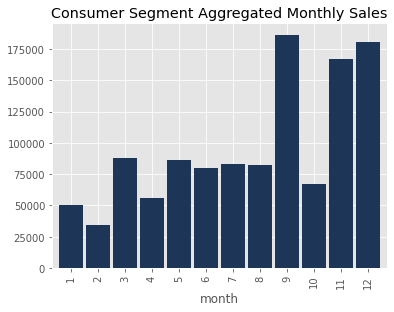

In [48]:
data.query('Segment == "Consumer"').groupby('month')['Sales'].sum().plot(kind='bar',\
                                                                         figsize=(6,4.5),\
                                                                         width=.89,\
                                                                         color='#1d3557')
plt.title('Consumer Segment Aggregated Monthly Sales')
plt.show()

Under consumer segment, sales in September, November, and December are higher than the rest of the year. This supports the possibility that increased sales in September may be due to the reopening of classes (sales of school-related products also increased).

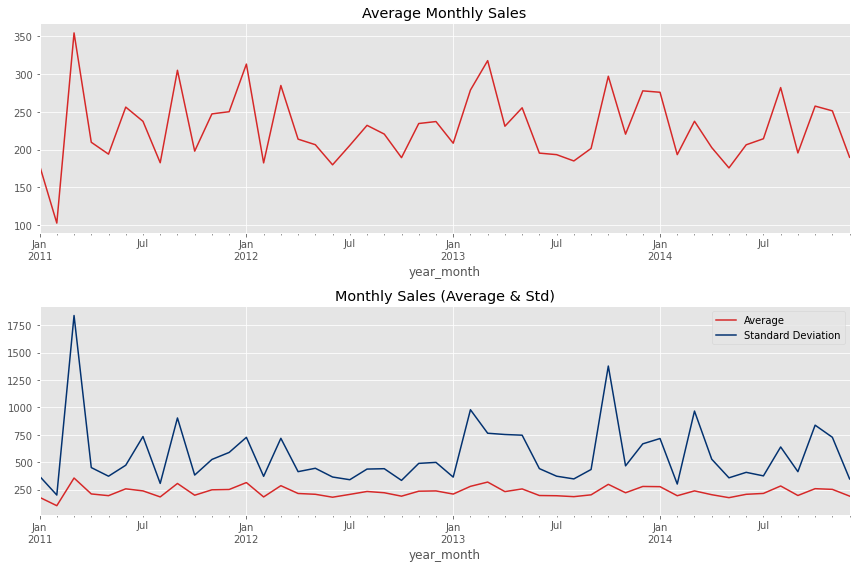

In [49]:
plt.figure(figsize=(12,8))

plt.subplot(211)
data.groupby('year_month')['Sales'].mean().plot(linewidth=1.5,color='#d62828')
plt.title('Average Monthly Sales')

plt.subplot(212)
data.groupby('year_month')['Sales'].mean().plot(linewidth=1.5,color='#d62828')
data.groupby('year_month')['Sales'].describe()['std'].plot(linewidth=1.5,color='#033270')
plt.title('Monthly Sales (Average & Std)')
plt.legend(['Average','Standard Deviation'])

plt.tight_layout()
plt.show()

Huge variation in sales within each month can be observed throughout the period. This is confirmed by the monthly sales' standard deviation above. Interestingly, this variation seems to have a pattern. Sales were more variable during March, and around September and October. Interestingly,from April 2012 until the end of the year, there seemed to have low variability in the sales. Along with this, the general sales trend in 2012 was slightly downward, as can be seen in the total yearly sales graph - when total yearly sales dipped a little from 2011 to 2012. On the other hand, sales were more variable in 2011, 2013, and 2014.

Store sales are typically subject to variablity in sales due to a number of observable factors such as seasonality, customer behaviors, and competitive landscape, among others.

Key findings:

1. Yearly sales had been growing during the 4 year period. Growth was slowest in 2012 and fastest in 2013.
2. Seasonal trends can be observed with sales. Sales generally increase towards the end of the year - November and December (holidays) and in September (possibly due to the opening of schools. Sales under consumer segment also incrased during these months. Increase in school and office supplies sales was also observed).
3. Sales had been very variable especially in March and around September and October. No significant variability was observed from April 2012, until the end of the year.

### 3.2. Product Categories

Which product categories contributed the most to the company's sales? Which categories are underperforming, if any?

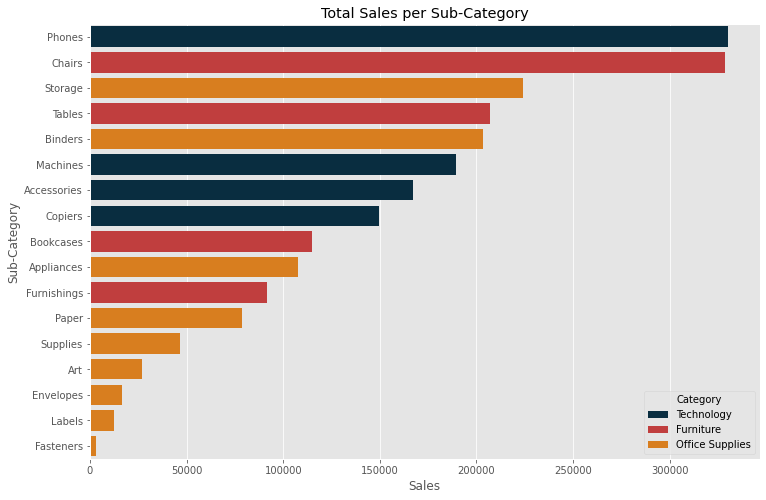

In [51]:
df_sales=pd.DataFrame(data.groupby(['Category','Sub-Category'])['Sales'].sum()).reset_index().sort_values('Sales',ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x='Sales',y='Sub-Category',data=df_sales,hue='Category',palette=['#003049','#d62828','#f77f00'])
plt.title('Total Sales per Sub-Category')

plt.show()

The visualization above shows a general overview of the magnitude of sales for each product sub-category. For technology category, phones are the top sales-generating products. Chairs products for furnitures category, and storage products for office supplies category. Throughout the 4-year period from 2011 - 2014, phones, chairs, and storage products are the three most sales-generating products. Along with them are tables, binders, and machine products.

Under the technology category, copier products are the least performing. For the furniture and office supplies category, furnishings and fasteners are the least performing.

It is worth noting that phones and chairs products sales, which are significantly higher than the rest of the sub-categories, belong to Technology and Furniture product categories, products that are generally expensive.

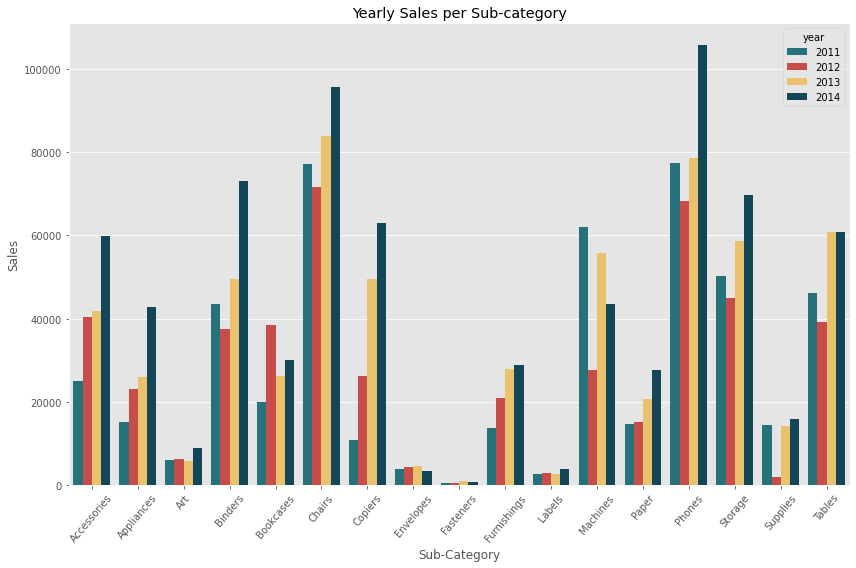

In [52]:
yearly_sales=pd.DataFrame(data.groupby(['Sub-Category','year'])['Sales'].sum()).reset_index()
yearly_sales

plt.figure(figsize=(12,8))
sns.barplot(data=yearly_sales,x='Sub-Category',y='Sales',hue='year',palette=['#177e89','#db3a34','#ffc857','#084c61'])
plt.xticks(rotation=50)
plt.title('Yearly Sales per Sub-category')

plt.tight_layout()
plt.show()

Shown is how sales on different products had changed over the 4-year period. For some product categories, sales had been fastest growing in 2014. This was not the case for bookcases, machines, supplies, and tables, which all saw a slow growth in sales in the same year. In 2012, products under binders, phones, storages, supplies, and tables experienced negative growth in sales, especially machine products

In [53]:
yearly_sales['yearly_growth_rate'] = yearly_sales.groupby('Sub-Category')['Sales'].pct_change() * 100
print('Sales Annual Average Growth Rate:')
pd.DataFrame(yearly_sales.groupby('Sub-Category')['yearly_growth_rate'].mean().sort_values(ascending=False))

Sales Annual Average Growth Rate:


,yearly_growth_rate
Sub-Category,
Supplies,185.7423
Copiers,85.8547
Appliances,42.8799
Accessories,36.1576
Furnishings,29.4793
Bookcases,24.9344
Paper,24.1187
Binders,21.9130
Art,16.1833


By average sales annual growth rate, envelope products had been the slowest while supplies products had been the fastest at 185% annual average growth rate (AAGR), followed by copier and appliances products at 86% and 43% AAGR, respectively.

Key Findings:

1. During the 4-year period, phones generated the most sales under the technology category, chairs for the furniture category, and storage products for office supplies category. These three are followed by tables, binders, and machine products. On the other hand, copiers, furnishings, and fasteners are the least sales-generating products under the technology, furniture, and office supplies category, respectively.
2. Yearly sales had been variable for each product sub-category. No apparant pattern is visibile on them. For phones, binders, appliances, and accessories, sales growth was fastest in 2014. For copiers, machines and tables, it was in 2013.
3. By average annual sales growth, supplies, copiers, and appliances were the top 3 fastest growing. On the other hand, envelopes, chairs, and machines are the top 3 slowest growing.

### 3.3. Geographic Insights

How does sales performance vary across the regions? Are there promising geographical regions or areas requiring improved marketing?

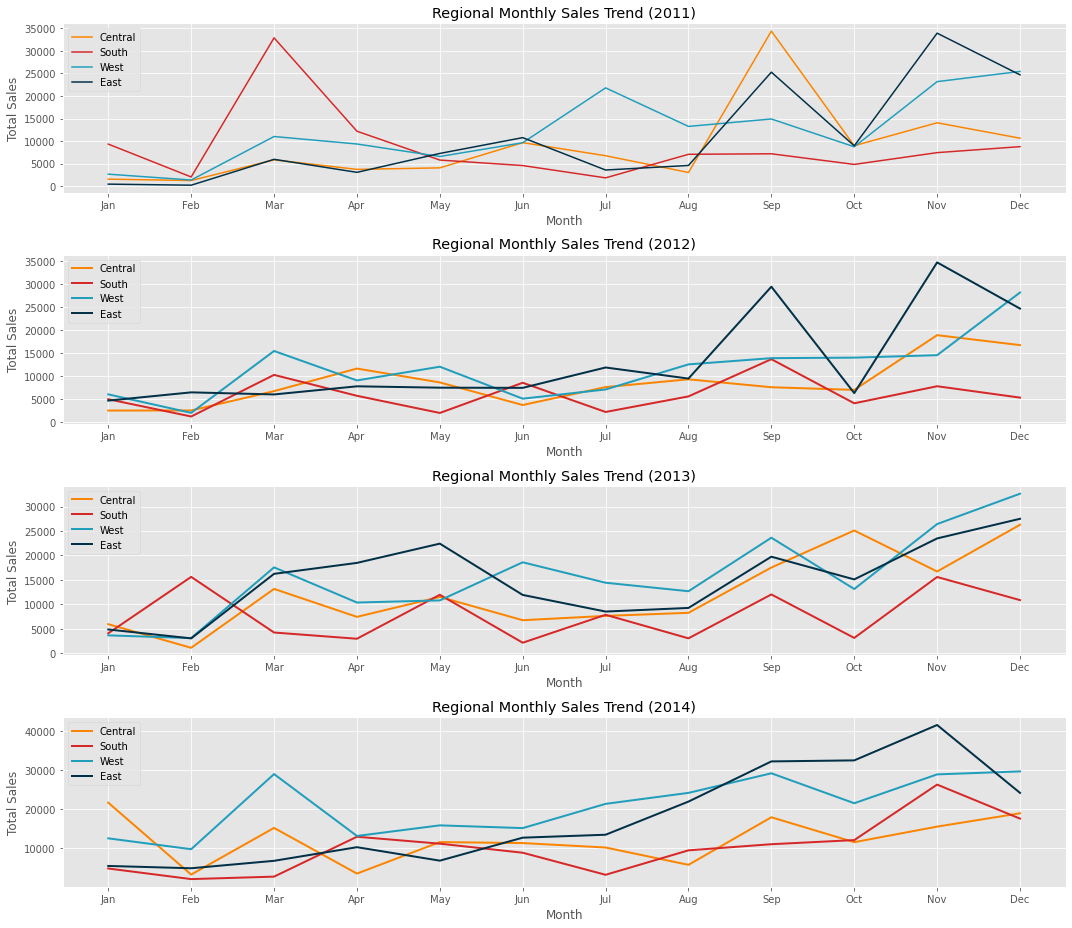

In [54]:
data11=data.query('year == 2011')
data12=data.query('year == 2012')
data13=data.query('year == 2013')
data14=data.query('year == 2014')

plt.figure(figsize=(15,13))

plt.subplot(411)
data11.query("Region == 'Central'").groupby('month')['Sales'].sum().plot(c='#fb8500',linewidth=1.5)
data11.query("Region == 'South'").groupby('month')['Sales'].sum().plot(c='#d62828',linewidth=1.5)
data11.query("Region == 'West'").groupby('month')['Sales'].sum().plot(c='#219ebc',linewidth=1.5)
data11.query("Region == 'East'").groupby('month')['Sales'].sum().plot(c='#023047',linewidth=1.5)

plt.title('Regional Monthly Sales Trend (2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(['Central','South','West','East'])

plt.subplot(412)
data12.query("Region == 'Central'").groupby('month')['Sales'].sum().plot(c='#fb8500',linewidth=2)
data12.query("Region == 'South'").groupby('month')['Sales'].sum().plot(c='#d62828',linewidth=2)
data12.query("Region == 'West'").groupby('month')['Sales'].sum().plot(c='#219ebc',linewidth=2)
data12.query("Region == 'East'").groupby('month')['Sales'].sum().plot(c='#023047',linewidth=2)

plt.title('Regional Monthly Sales Trend (2012)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(['Central','South','West','East'])

plt.subplot(413)
data13.query("Region == 'Central'").groupby('month')['Sales'].sum().plot(c='#fb8500',linewidth=2)
data13.query("Region == 'South'").groupby('month')['Sales'].sum().plot(c='#d62828',linewidth=2)
data13.query("Region == 'West'").groupby('month')['Sales'].sum().plot(c='#219ebc',linewidth=2)
data13.query("Region == 'East'").groupby('month')['Sales'].sum().plot(c='#023047',linewidth=2)

plt.title('Regional Monthly Sales Trend (2013)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(['Central','South','West','East'])

plt.subplot(414)
data14.query("Region == 'Central'").groupby('month')['Sales'].sum().plot(c='#fb8500',linewidth=2)
data14.query("Region == 'South'").groupby('month')['Sales'].sum().plot(c='#d62828',linewidth=2)
data14.query("Region == 'West'").groupby('month')['Sales'].sum().plot(c='#219ebc',linewidth=2)
data14.query("Region == 'East'").groupby('month')['Sales'].sum().plot(c='#023047',linewidth=2)

plt.title('Regional Monthly Sales Trend (2014)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(['Central','South','West','East'])

plt.tight_layout()
plt.show()

As shown before, seasonal trend occured, with sales increasing in holidays (November and December), opening of classes (September), and possibly Easter (March). This is also the case with regional sales data per year. Total sales has been generally higher most of the year in the West, followed by the East compared to the remaining two regions. Sales in the South has been lower each year compared to other regions with the exception in March 2011 when sales in the South was more than thrice the next best performer.

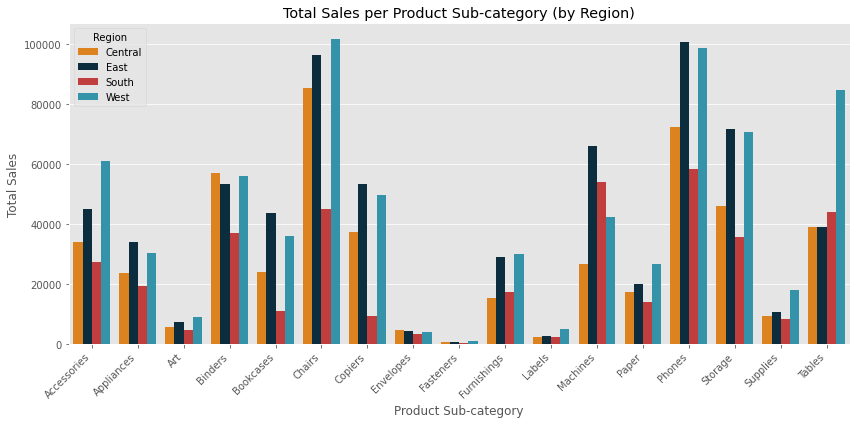

In [55]:
reg_sub=pd.DataFrame(data.groupby(['Region','Sub-Category'])['Sales'].sum()).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=reg_sub, x='Sub-Category', y='Sales', hue='Region',palette=['#fb8500','#023047','#d62828','#219ebc'])
plt.xlabel('Product Sub-category')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product Sub-category (by Region)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

Sales for most sub-categories has been lower in the South and higher in the West. For certain products, sales has been significantly lower in the South. For instance, sales for chairs and copiers products in the South are significantly lower compared to all other regions, while machine and table products sales has been higher in the South than in other Regions. For most sub-categories, sales in the Central region was just slightly higher than that of the South. Another notable observation from this is that sales of certain products sub-category are significantly higher in the West than all other remaining regions. Those products are table, office supplies, and technology accessories.

The dataset is fictional and does not provide background information about the regions. However, based on the sales, it can be hypothesized that more offices and business districts are probably located in the West and in the East than in Central and South regions. Office supplies sales like storages, binders, and appliances are significantly lower in the South and Central than the remaining regions. Conversely, sales for these products and tech ones are higher in the West and in the East. However, it is worth noting that the second highest sales for machine products was in the South.

Take note that this sales refer to total sales from 2011 - 2014 in each region, which does not show how sales behaved throughout the years. This visualization rather intends to show a rough estimate of the magnitude of sales for different products in each region.

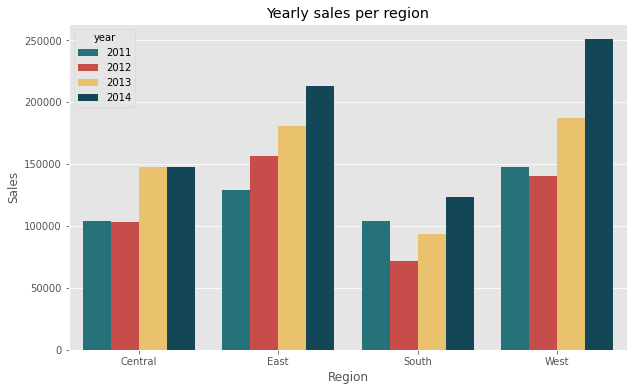

In [57]:
year_s=pd.DataFrame(data.groupby(['Region','year'])['Sales'].sum()).reset_index()
year_p=pd.DataFrame(data.groupby(['Region','year'])['(net)_profit_before_discount'].sum()).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=year_s,x='Region',y='Sales',hue='year',palette=['#177e89','#db3a34','#ffc857','#084c61'])
plt.title('Yearly sales per region')
plt.show()

Shown is how sales for each region changed over time. In the Central region, a sharp positive growth was observed from 2013, while yearly positive growth was consistent in the East. For the South region, a negative growth was observed in 2012, but the region rebounded thereafter. Simililarly for the West, negative growth was observed in 2012, but rebounded and sustained positive growth thereafter.

It was observed that there was a slight dip in total sales in 2012. From the visualization above, it can be inferred that South had contributed the most to that dip, followed by the West and then the Central. Interestingly, the East region still grew positively in 2012.

In [58]:
year_s['yearly_growth_rate']=year_s.groupby('Region')['Sales'].pct_change() * 100

print('Sales Average Annual Growth Rate (AAGR, 2011-2014) :')
pd.DataFrame(year_s.groupby('Region')['yearly_growth_rate'].mean())

Sales Average Annual Growth Rate (AAGR, 2011-2014) :


,yearly_growth_rate
Region,
Central,14.0524
East,18.3619
South,10.4230
West,20.7595


Using the Sales Average Annual Growth Rate (AAGR) of each region for the 4-year period, we see that the West had been the fastest growing Region in terms of sales, followed by the East, and then the Central region, and then South. Fruther investigation can be done to understand possible factors that may affect the differences which include economic factor, market conditions (saturation), consumer preference, among others.

Average Annual Growth Rate (AAGR) is calculated by getting the arithmetic mean of the yearly growth rates

Key Findings:

1. Seasonal trend was also present within each region. For all, sales generally increase towards the end of the year - November and December. Significant increase also happened in September, which can be attributed to the opening of classes. One thing to support this is the increased sales of school-related products and the ncreased sales under consumer segment during September. Monthly sales has been higher most of the year in the West followed by the East, compared to the remaining two regions. Sales in the South has been lower most of each year compared to other regions with the exception in March 2011 when sales in the South was more than thrice the next best performer.
2. Sales for most sub-categories had been lower in the South and higher in the West. Specifically, sales of office supplies and technology products are relatively higher in the West and in the East, while tables and machine products are higher in the South. For Central, sales had been generally consistent on most sub-cateogries. Sales for office supplies products such as art, envelopes, fasteners, and labels had been generally equal among all regions.
3. All regions recorded negative growth in 2012, except for Central which had positive growth.
4. By Sales Average Annual Growth Rate (AAGR) West had been the fastest-growing, followed by East, then Central, and then the South. (Relative growth rates comparision can also be done). Central was performing moderately well but not as strongly as the West and East.

### 3.4. Profitability

Which products are more profitable and which were not? With the available data, what factors affected the company's profit? How is the company's profitability during the period?

In [59]:
yearly_summary = data.groupby('year')[['Sales','net_profit']].sum()

yearly_summary['profit_margin'] = (yearly_summary['net_profit'] / yearly_summary['Sales']) * 100
yearly_summary

,Sales,net_profit,profit_margin
year,,,
2011,484247.4981,49543.9741,10.2311
2012,470532.5090,61618.6037,13.0955
2013,608473.8300,81726.9308,13.4315
2014,733947.0232,93507.5131,12.7404


Using profit margin, the company had generated the least profit in 2011 at 10.2311%. After a year, 2012, the company generated relatively higher profit at 13.0955% margin. This continued and the company registered a higher profit margin in 2013 at 13.4315%. The trend, however, slowed down and the company generated a lower profit margin at 12.7404%, even lower than that of 2012.

While profit margin is a good metric, it is not the only metric to understand the financial performance of the company. However, since this the dataset primarily contains sales data and is not a comprehensive company data (does not include data on Cost of Goods Sold (COGS), shareholder's equity, operating income, etc.) the analysis will make use of profit margin.

In [60]:
profit_margin_df=pd.DataFrame(data.groupby(['Category','Sub-Category'])['profit_margin'].mean()).reset_index()
print("This table shows exact values on the average profit margin of each product sub-category:")
profit_margin_df

This table shows exact values on the average profit margin of each product sub-category:


,Category,Sub-Category,profit_margin
0,Furniture,Bookcases,-12.6640
1,Furniture,Chairs,4.3900
2,Furniture,Furnishings,13.7066
3,Furniture,Tables,-14.7727
4,Office Supplies,Appliances,-15.6869
5,Office Supplies,Art,25.1646
6,Office Supplies,Binders,-19.9595
7,Office Supplies,Envelopes,42.3140
8,Office Supplies,Fasteners,29.9171
9,Office Supplies,Labels,42.9663


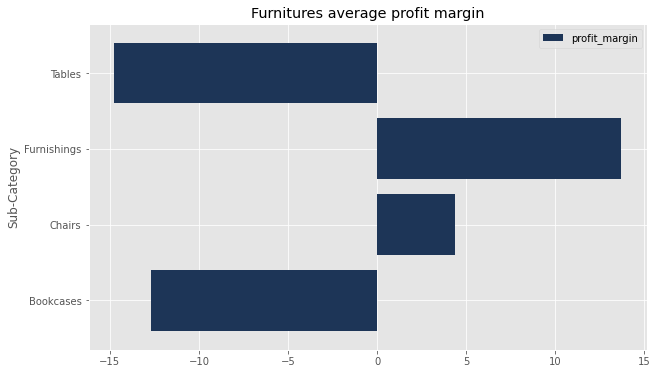

In [63]:
barr1=profit_margin_df[profit_margin_df['Category']=='Furniture'][['Sub-Category','profit_margin']].set_index('Sub-Category')

barr1.plot(kind='barh',title='Furnitures average profit margin',color='#1d3557',figsize=(10,6),width=.8)
plt.show()

For furnitures products, furnishings products, on average, are the most profitable followed by chairs products. On the other hand, the company was operating at a loss on tables and bookcases products. Assuming similar sales, loss on tables are higher than gains on furnishings.

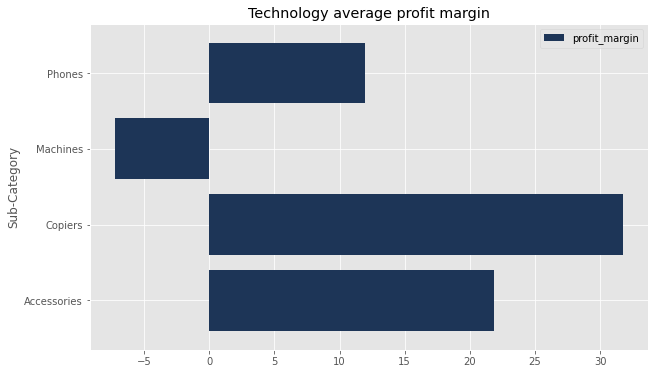

In [64]:
barr3=profit_margin_df[profit_margin_df['Category']=='Technology'][['Sub-Category','profit_margin']].set_index('Sub-Category')

barr3.plot(kind='barh',title='Technology average profit margin',color ='#1d3557',figsize=(10,6),width=.8)
plt.show()

On technology products, the company, on average, was profiting more compared to furniture ones. Three of its product sub-categories were generating profit at much higher margin profit: 12% for phones, 22% for tech accesories, and 32% profit margin for copiers products. The company, on the other hand, achines products, was operating at a loss with machine products.

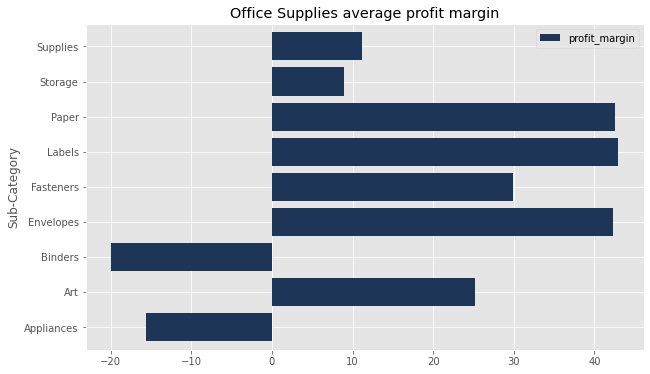

In [66]:
barr2=profit_margin_df[profit_margin_df['Category']=='Office Supplies'][['Sub-Category','profit_margin']].set_index('Sub-Category')

barr2.plot(kind='barh',title='Office Supplies average profit margin',color='#1d3557',figsize=(10,6),width=.8)

plt.show()

Not only do five product sub-categories under office supplies had over 20% profit margin, three of which had over 40% discount, two of the remaining four sub-categories had also positive profit margin of 9% and 11%. The company, on the other hand, were operating at a loss on the remaining two: binders and appliences products during the 4 year period.

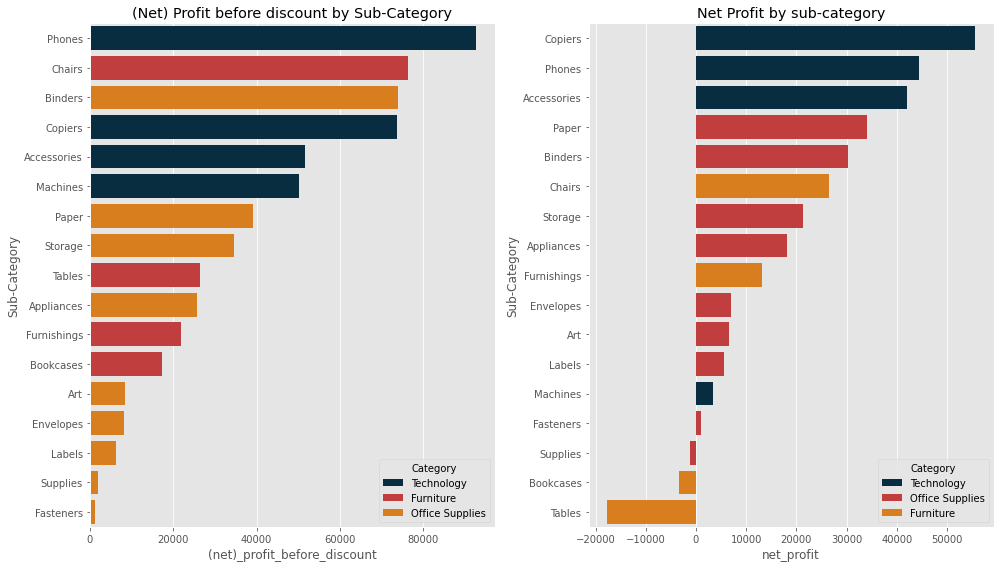

In [69]:
df_profit=pd.DataFrame(data.groupby(['Category','Sub-Category'])['(net)_profit_before_discount'].sum()).reset_index().sort_values('(net)_profit_before_discount',ascending=False)

plt.figure(figsize=(14,8))

plt.subplot(121)
sns.barplot(x='(net)_profit_before_discount',y='Sub-Category',data=df_profit,hue='Category',palette=['#003049','#d62828','#f77f00'])
plt.title('(Net) Profit before discount by Sub-Category')

plt.subplot(122)
df_profit2=pd.DataFrame(data.groupby(['Category','Sub-Category'])['net_profit'].sum()).reset_index().sort_values('net_profit',ascending=False)
sns.barplot(x='net_profit',y='Sub-Category',data=df_profit2,hue='Category',palette=['#003049','#d62828','#f77f00'])
plt.title('Net Profit by sub-category')

plt.tight_layout()
plt.show()

Note: (Barplot on the left shows (net) profit before discount, counts the total profit during the 4-year period. Plot on the right only shows how profit changed as an effect of applying the order discounts on the total. It is also important to understant that the values are in total which can mean the possibility that not all orders gained profit)

By product sub-category, phones, chairs, and binders products had generated the highest total profit from the technology, furniture, and office supplies category, respectively. They are also the ones who generated the highest profit, overall.

For each product category, machines, bookcases, and fastener products generated the least total profit from the technology, furniture, and office supplies category, respectively. Among all product sub-categories, fasteners products have gained the least profit, generating a total of 949 dollars.

Taking discounts into acccount, tables products went from 26,466 gross profit to -17,725 after discounts or a 167% drop (1.67x). Bookcases and supplies' profit after discount also went to to negative values. As can be seen in the table below, profit for all product sub-categories went down (percentage_drop column), with tables products having the highest drop and labels products having the least (10% drop).

A comprehensive review of the company's promotional activities (product discounts and strategy) may be done, specifically significant discounts that were not offset by increased sales.

As stated in the note, it is important to understand that the values used in the visualization was in total, which can show the appearance that all orders before discounts gained profit. This is wrong, there may be orders that did not gain profit, but was offset by larget profit behind the total profit shown in the visualization.

In [70]:
df_profit_beforeNafter=pd.merge(df_profit,df_profit2, on='Sub-Category',how='inner').drop('Category_y',axis=1)
df_profit_beforeNafter['percentage_drop']=df_profit_beforeNafter['net_profit'] / df_profit_beforeNafter['(net)_profit_before_discount'] *100 - 100
df_profit_beforeNafter=df_profit_beforeNafter.sort_values(by='percentage_drop',ascending=True)

print('This table shows how discounts applied to products during the 4-year period, affected (net) profit before discount: ')
df_profit_beforeNafter.sort_values('net_profit',ascending=False)

This table shows how discounts applied to products during the 4-year period, affected (net) profit before discount: 


,Category_x,Sub-Category,(net)_profit_before_discount,net_profit,percentage_drop
3,Technology,Copiers,73617.5553,55617.8249,-24.4503
0,Technology,Phones,92608.6698,44515.7306,-51.9314
4,Technology,Accessories,51738.6373,41936.6357,-18.9452
6,Office Supplies,Paper,39117.8365,34053.5693,-12.9462
2,Office Supplies,Binders,73966.8426,30221.7633,-59.1415
1,Furniture,Chairs,76404.9664,26590.1663,-65.1984
7,Office Supplies,Storage,34476.7960,21278.8264,-38.2807
9,Office Supplies,Appliances,25628.3051,18138.0054,-29.2267
10,Furniture,Furnishings,21768.0964,13059.1436,-40.0079
13,Office Supplies,Envelopes,8138.1671,6964.1767,-14.4257


Shown is a visual comparison of annual net profit of each product sub-category before applying order discounts:


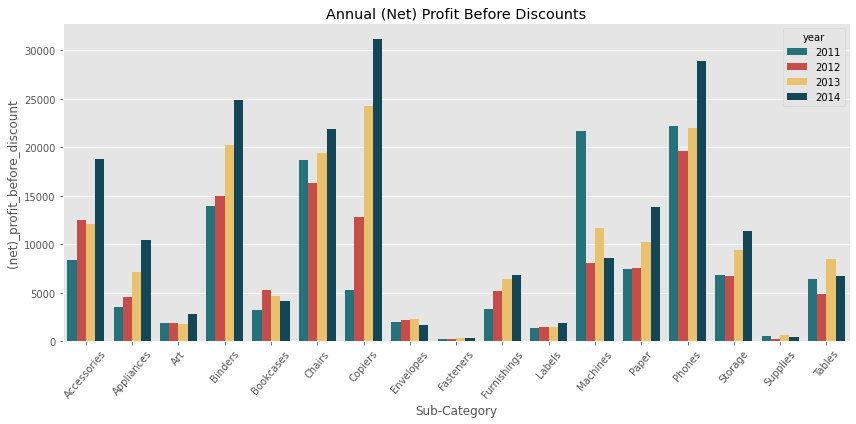

In [72]:
total_1=pd.DataFrame(data.groupby(['Sub-Category','year'])[['(net)_profit_before_discount']].sum().reset_index())

print('Shown is a visual comparison of annual net profit of each product sub-category before applying order discounts:')

plt.figure(figsize=(12,6))

sns.barplot(data=total_1,x='Sub-Category',y='(net)_profit_before_discount',hue='year',palette=['#177e89','#db3a34','#ffc857','#084c61'])
plt.xticks(rotation=50,ha='center')
plt.title('Annual (Net) Profit Before Discounts')

plt.tight_layout()
plt.show()

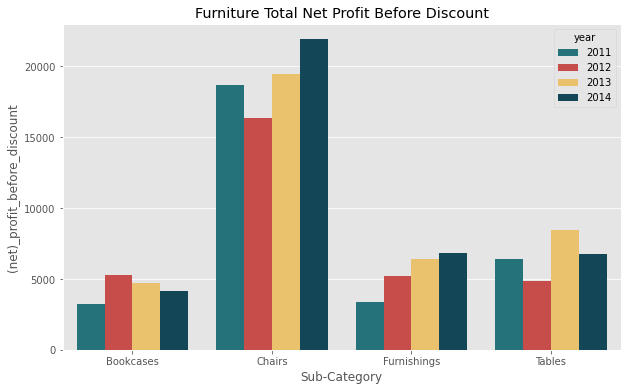

In [73]:
total_profit_b4_dis=pd.DataFrame(data.groupby(['Category','Sub-Category','year'])['(net)_profit_before_discount'].sum()).reset_index()

plt.figure(figsize=(10,6))

furniture=total_profit_b4_dis[total_profit_b4_dis['Category']=='Furniture']
sns.barplot(data=furniture,x='Sub-Category',y='(net)_profit_before_discount',hue='year',palette=['#177e89','#db3a34','#ffc857','#084c61'])
plt.title('Furniture Total Net Profit Before Discount')

plt.show()

Total profit of chairs products over the course of four years had been significantly higher compared to all other furniture products. It can also be noted that profit growth had been consistent for furnishings while a downard trend was observed for bookcases after 2012

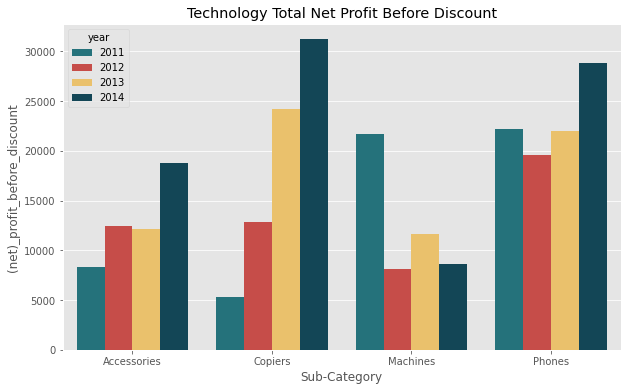

In [75]:
plt.figure(figsize=(10,6))

technology=total_profit_b4_dis[total_profit_b4_dis['Category']=='Technology']
sns.barplot(data=technology,x='Sub-Category',y='(net)_profit_before_discount',hue='year',palette=['#177e89','#db3a34','#ffc857','#084c61'])
plt.title('Technology Total Net Profit Before Discount')

plt.show()

Copiers' profit growth during the period was impressive considering how fast it was. Machines' profit growth, on the other hand, was generally stagnant, Copiers' profit growth during the period was impressive considering how fast it was. Machines' profit growth, on the other hand, was generally stagnant, with slight profit growth in 2013. While profit for phones was relatively higher compared to other products, its growth was not as fast as copiers.

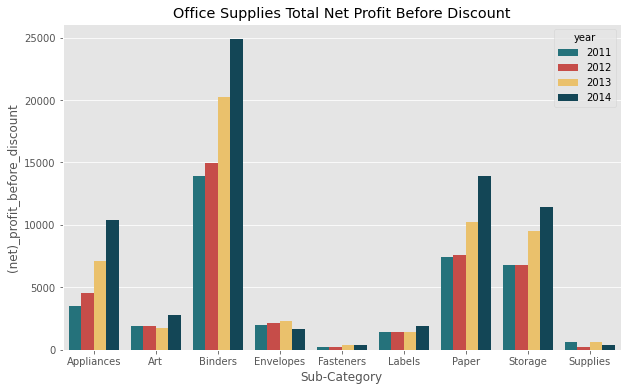

In [76]:
plt.figure(figsize=(10,6))

office_supplies=total_profit_b4_dis[total_profit_b4_dis['Category']=='Office Supplies']
sns.barplot(data=office_supplies,x='Sub-Category',y='(net)_profit_before_discount',hue='year',palette=['#177e89','#db3a34','#ffc857','#084c61'])
plt.title('Office Supplies Total Net Profit Before Discount')

plt.show()

There are products orders that were already losses (expenses > sale) to the company even before applying discounts, which can be due to a number of reason including:

1. The cost of producing the product is too high.
2. The product is being sold at a price that is too low.; and
3. The product is not in demand.
It was discovered that discounts had made significant impact on certain product that the losses were amplified.

There are a number of reasons why discounts are applied by the company. It can be "promotional" which aims to entice consumers to buy more or switch from a company to another (the one selling at discounts), clear old inventory, promote a new product, or build customer loyalty, among others. Essentially, discounts should benefit the company in some ways.

Experiments are the only thing that can establish cause and effect relationship, which in this case can be: do discounts cause a rise in sales or do discounts cause the to gain new customers? Experiments cannot be done in this analysis, instead, the following explores the distribution of discounts and describes the characteristics of orders within each discount groups.

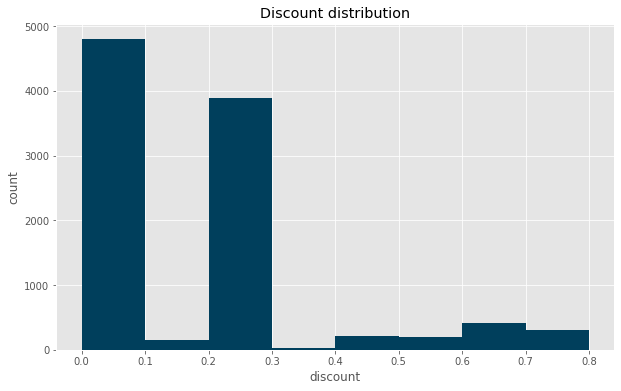

In [79]:
plt.figure(figsize=(10,6))
plt.hist(data=data,x='Discount',bins=8,color='#003f5c') # distribution of discount
plt.title('Discount distribution')
plt.xlabel('discount')
plt.ylabel('count')
plt.show()

With the available data, discounts is an important factor in the profit generated by the company in the 4-year period. This histogram shows that most orders have either no discount or had 20% off. A number of orders around 400 and below, on the other hand, had either 60%, 70% or 80% discount. It is possible that these highly discounted products had high sales and were on the expensive end, or they are not.

In [80]:
print('Summary statistics on orders that had no discount (0%):')
data[data['Discount'] == 0][['Sales','selling_price','(net)_profit_before_discount']].agg(['mean','median','sum','std','count'])

Summary statistics on orders that had no discount (0%):


,Sales,selling_price,(net)_profit_before_discount
mean,226.7421,58.9050,66.9003
median,53.5500,15.9850,15.9952
sum,1087908.4700,282626.3900,320987.6032
std,650.3189,150.3307,257.0554
count,4798.0000,4798.0000,4798.0000


In [81]:
print('Summary statistics on orders that had 20% discount:')
data[data['Discount'] == .20][['Sales','selling_price','(net)_profit_before_discount']].agg(['mean','median',lambda x: x.quantile(0.75),\
                                                                                             'sum','std','count']).rename({'<lambda>':'.75'})

Summary statistics on orders that had 20% discount:


,Sales,selling_price,(net)_profit_before_discount
mean,209.0769,57.7696,66.5180
median,51.9840,15.9920,16.4295
.75,201.5840,60.7840,54.1134
sum,764594.3680,211263.6000,243256.1796
std,476.2236,122.5331,194.6845
count,3657.0000,3657.0000,3657.0000


Comparing it to orders that had 20% discount, orders with 20% discount had median sales of 51 US dollars, not significantly far from median sales of orders with no discounts. In terms of profit before discounts, there is little difference between the two discount groups.

In [82]:
print('Summary statistics on orders that had 40% discount:')
data[data['Discount'] == .40][['Sales','selling_price','(net)_profit_before_discount']].agg(['mean','median',lambda x: x.quantile(0.75),\
                                                                     'sum','std','count']).rename({'<lambda>':'.75'})


Summary statistics on orders that had 40% discount:


,Sales,selling_price,(net)_profit_before_discount
mean,565.1349,145.5547,114.1265
median,314.1270,107.9940,37.2549
.75,630.0075,184.9200,102.1566
sum,116417.7840,29984.2740,23510.0632
std,958.9402,191.9070,363.3008
count,206.0000,206.0000,206.0000


With orders that had 40% discount, the products are generally expensive and had higher sales and profit before discounts compared to those that had lower discounts - 20% and 0 discounts.

In [83]:
print('Summary statistics on orders that had 50% discount:')
data[data['Discount'] == .50][['Sales','selling_price','(net)_profit_before_discount']].agg(['mean',\
                                                                     'median',\
                                                                     lambda x: x.quantile(0.75),\
                                                                     'sum','std','count']).rename({'<lambda>':'.75'})

Summary statistics on orders that had 50% discount:


,Sales,selling_price,(net)_profit_before_discount
mean,892.7052,215.7240,135.6491
median,301.9600,90.8825,-20.0020
.75,613.6425,156.6125,1.5971
sum,58918.5400,14237.7850,8952.8419
std,2917.8443,520.6492,1176.5353
count,66.0000,66.0000,66.0000


With orders that had 50% discount, products are generally cheaper compared to those that had, at most, 40% discount. Sales are also lower. In addition, 50% of the orders had already less than -20 dollars in profit even before discounts. 75% of all orders had less than 1.59 dollars profit even before applying the 50% discount. This means that these products are gaining any money even before discounts.

A comprehensive review of pricing strategy, expenses like production cost, operational cost, and many others may be done.

In [84]:
print('Summary statistics on orders that had 60% discount:')
data[data['Discount'] == .60][['Sales','selling_price','(net)_profit_before_discount']].agg(['mean',\
                                                                     'median',\
                                                                     lambda x: x.quantile(0.75),\
                                                                     'std','sum','count']).rename({'<lambda>':'.75'})

Summary statistics on orders that had 60% discount:


,Sales,selling_price,(net)_profit_before_discount
mean,48.1500,12.7243,-14.1872
median,22.4940,7.5760,-0.2737
.75,56.5080,16.4850,1.7850
std,71.4032,15.0380,39.6761
sum,6644.7000,1755.9520,-1957.8352
count,138.0000,138.0000,138.0000


For orders that had 60% discount, the products are significantly lower, and sales and profit are also significantly lower compared to those that had lower discounts.

In [85]:
print('Summary statistics on orders that had 70% discount:')
data[data['Discount'] == .70][['Sales','selling_price','(net)_profit_before_discount']].agg(['mean',\
                                                                     'median',\
                                                                     lambda x: x.quantile(0.75),\
                                                                     'std','sum','count']).rename({'<lambda>':'.75'})

Summary statistics on orders that had 70% discount:


,Sales,selling_price,(net)_profit_before_discount
mean,97.1777,23.8010,-27.8497
median,12.2940,3.5190,-0.3958
.75,38.1645,9.9840,0.0000
std,341.5218,79.8862,203.5403
sum,40620.2820,9948.8280,-11641.1595
count,418.0000,418.0000,418.0000


Similary for orders that had 70% discount, selling price, sales, and profit before discounts are significantly lower.

In [86]:
print('Summary statistics on orders that had 80% discount:')
data[data['Discount'] == .80][['Sales','selling_price','(net)_profit_before_discount']].agg(['mean',\
                                                                     'median',\
                                                                     lambda x: x.quantile(0.75)\
                                                                     ,'std','sum','count']).rename({'<lambda>':'.75'})

Summary statistics on orders that had 80% discount:


,Sales,selling_price,(net)_profit_before_discount
mean,56.5459,12.8677,-56.5601
median,8.7010,2.3000,-7.7625
.75,23.9320,6.5360,-2.9485
std,216.7684,40.9608,185.8065
sum,16963.7560,3860.3160,-16968.0344
count,300.0000,300.0000,300.0000


The same can be observed with orders having 80% discounts.

This tells us that those orders that had higher discounts are neither expensive, generated lower sales and profit compared to those orders with lower discounts (<= 40%).

In [87]:
data.groupby('Discount')[['(net)_profit_before_discount']].agg(['mean',\
                                                                'min',\
                                                                'median',\
                                                                lambda x: x.quantile(0.75),\
                                                                'max',\
                                                                'count']).rename(columns={'<lambda_0>':'.75'})

(net)_profit_before_discount                                         \
                                 mean        min   median      .75       max   
Discount                                                                       
0.0000                        66.9003     0.0000  15.9952  50.3658 8399.9760   
0.1000                       153.8948     6.4784  84.2193 183.7215  985.9942   
0.1500                       106.7840     5.2867  56.8606  97.1591  671.3132   
0.2000                        66.5180  -116.5934  16.4295  54.1134 6159.9824   
0.3000                        90.7433   -22.4784  58.1952 127.5867  693.9702   
0.3200                        83.2137    -4.7732  41.9066  85.7254  449.6522   
0.4000                       114.1265  -218.7801  37.2549 102.1566 4479.9872   
0.4500                        -2.2612   -95.1562   5.2287  21.4886   47.8789   
0.5000                       135.6491  -225.3960 -20.0020   1.5971 9508.1616   
0.6000                       -14.1872  -222.2740  -0.2737   1.7850   24.4998   
0.7000                       -27.8497 -3449.9885  -0.3958   0.0000   53.2686   
0.8000                       -56.5601 -1959.8256  -7.7625  -2.9485   -0.5004   

                
         count  
Discount        
0.0000    4798  
0.1000      94  
0.1500      52  
0.2000    3657  
0.3000     227  
0.3200      27  
0.4000     206  
0.4500      11  
0.5000      66  
0.6000     138  
0.7000     418  
0.8000     300

The table above shows there were 4798 orders that had no discount while 300 orders each had an 80% discount. Here, the min and max columns refer to the minimum and maximum profit of all the orders from the corresponding discount value.

Key Findings:

1. The company had, on average, profit margin of over 10% since 2011, and had been increaseing until 2013. In 2014, the company's profitability lowered down, but it was still higher than in 2011.
2. On average, furnishings, copiers, and labels products had been the most profitable under each product category. On the other hand, chairs, phones, and storage products were the least profitable under each category. Tables, bookcases, machines, binders, and appliances, on average, was found to have negative profit margin.
3. By product sub-category, phones, chairs, and binders products had generated the highest total profit from the technology, furniture, and office supplies category, respectively. They are also the ones who generated the highest profit, overall. For each product category, machines, bookcases, and fastener products generated the least total profit from the technology, furniture, and office supplies category, respectively. Among all product sub-categories, fasteners products have gained the least profit, generating a total of 949 dollars.
4. Taking discounts into account, profit drop as much as 167% for tables products, 164% for office suplies products, and 120% for Bookcases. Labels' total profit under the office supplies category, on the other hand, was the least affected by discounts at just 10% drop.
5. Total profit of chairs products over the course of four years had been significantly higher compared to all other furniture products. Copiers' profit growth during the period was impressive considering how fast it was. Machines' profit growth, on the other hand, was generally stagnant. For most office supplies products, profit growth was minimal. An upward growth trend, however, is evident, among appliances, binders, papers, and storage products.
6. 6.1.) There is huge variation in sales and price of products that do not have discounts. Orders with 20% discount had median sales of 51 US dollars, not significantly far from median sales of orders with no discounts. In terms of profit before discounts, there is little difference between the two discount groups. 6.2.) Orders that had higher discounts are neither expensive nor generated higher sales and profit compared to those orders with lower discounts (<= 40%).

Further questions and useful metrics:

Q1. What portion of all ordes was shipped through each mode?

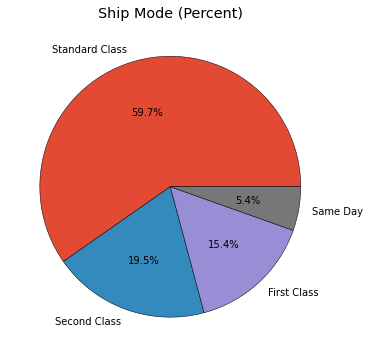

In [89]:

i3=data['Ship Mode'].value_counts()/len(data)*100
i3

plt.figure(figsize=(10,6))
plt.pie(i3,labels=i3.index,autopct='%.1f%%',textprops={'fontsize':10},wedgeprops={'edgecolor': 'black'})
plt.title('Ship Mode (Percent)')

plt.show()

60% of all orders had been shipped through standard class mode with an average fulfillment time of 5 days (see info below). 20% was shipped through second class with an average fulfillment time of 3 days, and 15% was shipped through first class mode with an average of 2 days fulfillment time. 5% of all orders was shippied through same day mode.

In [90]:
print('Following are the average order fulfillment time for corresponding ship modes:')

print("Standard Class:",data[data['Ship Mode'] == 'Standard Class']['order_fulfillment_time'].mean())
print("Second Class:",data[data['Ship Mode'] == 'Second Class']['order_fulfillment_time'].mean())
print("First Class:",data[data['Ship Mode'] == 'First Class']['order_fulfillment_time'].mean())

Following are the average order fulfillment time for corresponding ship modes:
Standard Class: 5 days 00:10:22.520107238
Second Class: 3 days 05:45:44.884318766
First Class: 2 days 04:22:09.518855656


Average fulfillment time for standard class mode is 5 days, 3 days for second class mode, and 2 days for first class mode.

In [91]:
print('Annual Average Transaction Value (nominal):')

av_tv=pd.DataFrame(data.groupby('year')['Sales'].sum() / data['Order ID'].nunique())
av_tv['change'] = av_tv['Sales'].pct_change() * 100
av_tv

Annual Average Transaction Value (nominal):


,Sales,change
year,,
2011,96.6755,NaN
2012,93.9374,-2.8322
2013,121.4761,29.3160
2014,146.5257,20.6210


The average transaction value measures how much on average customers spend each time they make a purchase. On the table above, customers had been spending more on each transaction annualy. It can be seen, however, that customers had spent less in 2012 than in the previous year, 2011. It then grew 29% in 2013, and 20% in 2014. Take note that the true change in the average transaction value can only be known after accounting for factors such as inflation. The figure above is just an rough estimate

In [92]:
print('Annual Discounted Sales')
pd.DataFrame(data.groupby('year')['discounted_sales'].sum())

Annual Discounted Sales


,discounted_sales
year,
2011,406690.7027
2012,407671.3237
2013,527707.8887
2014,632548.8109


Discounted sales measure the actual revenue that the company receives from its customers after accounting for discounts.

In [93]:
profit_met=pd.DataFrame(data.groupby('year')[['net_profit','Sales']].sum())
profit_met['net_profit_margin'] = (profit_met['net_profit'] / profit_met['Sales']) * 100
profit_met

,net_profit,Sales,net_profit_margin
year,,,
2011,49543.9741,484247.4981,10.2311
2012,61618.6037,470532.5090,13.0955
2013,81726.9308,608473.8300,13.4315
2014,93507.5131,733947.0232,12.7404


Net profit margin represents the overall profitability of the company after accountign for all expenses.

---------------------------------------------------------------------------------------------------------------------------------------------

# 4. Conclusion

The company experienced year-over-year sales growth, with 2013 showing the highest growth and 2012 the slowest. Seasonal sales trends were also evident, with spikes in November, December, and September. Sales were highly variable in March, and around September and October. Phones, chairs, and storage products led sales within their respective categories, while copiers, furnishings, and fasteners lagged.

By region, the West and East had higher sales across most categories, while the South had consistently lower sales. Central, on the other hand, showed positive growth in 2012, in contrast to all other regions in the same year. Furthermore, the West had the fastest average annual sales growth.

Despite fluctuating profitability, the company maintained a 10%+ profit margin from 2011 to 2014. Chairs, phones, and storage products were the least profitable, while furnishings, copiers, and labels were the most profitable sub-categories. Sales discounts significantly impacted profits, with tables and office supplies experiencing the largest drops.

In conclusion, while the company saw sales growth and maintained profitability, seasonal and regional variations played a significant role in its performance, and discounts affected profit margins.

---------------------------------------------------------------------------------------------------------------------------------------------

# 5. Recommendation

Based on the the key findings, the following recommendations are presented:

1. Given evident seasonal trends, consider adjusting inventory levels to cater increased demand during November, December, and September. With this, stockouts during peak periods and overstocking during off-peak can be prevented/minimized.
2. Formulate strategies to boost sales in regions with lower performance, especially in the South. It is also very important to conduct further investigation/research on regional preferences, adjust product offerings or marketing to better cater to local/targeted markets.
3. Further assess the impact of discounts on profit margins. A comprehensive review of discount strategy should be done to maintain profitability while attracting more customers or increasing sales.
4. Expand or diversify product range. Consider introducing new products/categories or enhancing existing ones to tap into more/other customer segments.
5. Examine the performance of product sub-categories in more detail. Identify which specific products within each category are the most and least profitable, and decide on whether to optimize or discontinue specific products.
6. Optimize supply chain management to reduce variability in sales (among other factors for sales variability). Implement more efficient inventory management and demand forecasting techniques to mitigate stockouts and overstocking.
7. Reevaluate regional growth strategies based on the relative performance of each region. Consider shifting resources and marketing efforts toward regions with higher growth potential.
8. Continue efforts to control costs and maintain a good profit margin, even during periods of fluctuating profitability.

---------------------------------------------------------------------------------------------------------------------------------------------